### BEER REVIEW STATS
#### Use statistics to evaluate the beer reviews.  Let's look at distributions of different styles, and see how they compare.

In [1]:
# IMPORT MODULES AND THE DATA SET
import numpy as np
import pandas as pd

df = pd.read_csv('beer.csv', header=0)
pd.set_option('max_colwidth', 220)
print(df.shape)
df.head(3)

(80818, 5)


,name,brewery,style,rating,review
0,Big Rock Ale,Big Rock Brewery,Scottish Ale,3.90,"smell  soft hop aroma with significant malt scents. this one smells very creamy. taste  and creamy it is. the traditional irish flavors come out at the tongue. this is creamy, not like a cream ale, but close. the m..."
1,Flip Ale,Dogfish Head Craft Brewery,Old Ale,4.08,on tap at dfh rehoboth... collab with eatily... cardamom and red wine must. golden orange. .no head. typical dfh yeast aroma. ..some spice and maybe a belgian influence. sweet spicy and somewhat fruity.. not much ol...
2,The Almond Marzen Project - Beer Camp #26,Sierra Nevada Brewing Co.,Märzen / Oktoberfest,3.78,"nice auburn impressions, tons of clarity, solid inch of off white head. aroma was a little bit sweet and nutty. taste gave a little more sweetness, stayed away from hops and bitterness, relatively light bodied. no..."


#### Here's the list of beer styles, and number of reviews of each.

In [2]:
# group number of reviews for each style and plot on bar chart
import matplotlib.pyplot as plt
import seaborn as sns
styles = pd.DataFrame()
labels = df.groupby(['style']).size() 
styles['count'] = labels
styles['style'] = labels.index
styles = styles.sort_values(by='count', ascending=False)
fig, ax = plt.subplots()
fig.set_size_inches(8,19)
sns.barplot(x='count', y='style', data=styles, ax=ax, palette="coolwarm", edgecolor="k")
plt.title("count of each beer style's reviews", size=16)
plt.ylabel('style', size=16)
plt.xlabel('count', size=16)
plt.show()

<Figure size 800x1900 with 1 Axes>

#### Here's the ratings distribution of all reviews in my data set.

In [3]:
df.rating.describe()

count    80818.000000
mean         3.732785
std          0.458766
min          1.000000
25%          3.520000
50%          3.790000
75%          4.010000
max          5.000000
Name: rating, dtype: float64

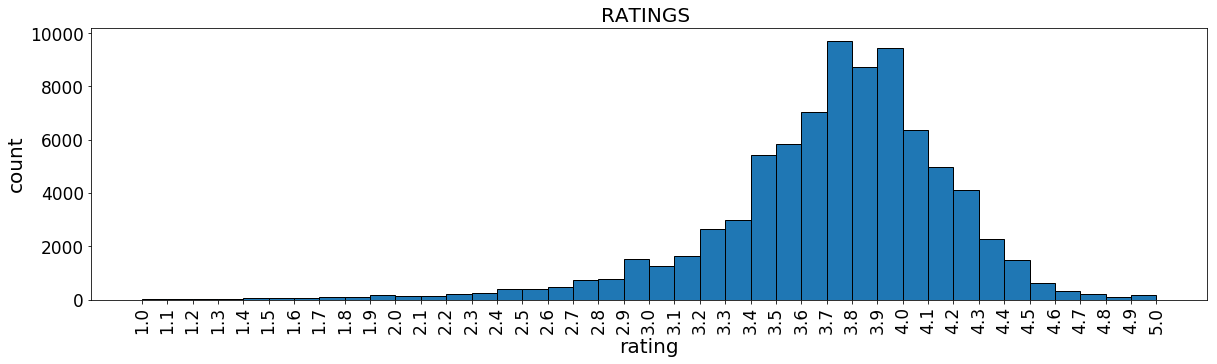

mean rating: 3.73
standard deviation: 0.4588
median rating: 3.79


In [4]:
# ratings distribution.  
import matplotlib.pyplot as plt
import matplotlib.mlab as mlab
import seaborn as sns

bins= np.arange(1,5.1,0.1)   # bins from 1 to 5, increments of 0.1
_= plt.figure(figsize=(20,5))
_= plt.hist(df['rating'], bins=bins, edgecolor="k") #
_= plt.xticks(bins, rotation='vertical',size=17)
_= plt.yticks(size=17)
_= plt.title('RATINGS ', size=20)
_= plt.xlabel('rating', size=20)
_= plt.ylabel('count', size=20)
plt.show()

meanrating= df.rating.mean()
print('mean rating: {:.2f}'.format(meanrating))
SDrating= df.rating.std()
print('standard deviation: {:.4f}'.format(SDrating))
print('median rating:', df.rating.median())

#### Here's the distribution for American IPA, the most reviewed beer style:

In [5]:
AmericanIPA = pd.DataFrame
AmericanIPA= df[df['style'] == 'American IPA']
AmericanIPA.describe()

,rating
count,9758.000000
mean,3.838392
std,0.361935
min,1.000000
25%,3.660000
50%,3.870000
75%,4.070000
max,5.000000


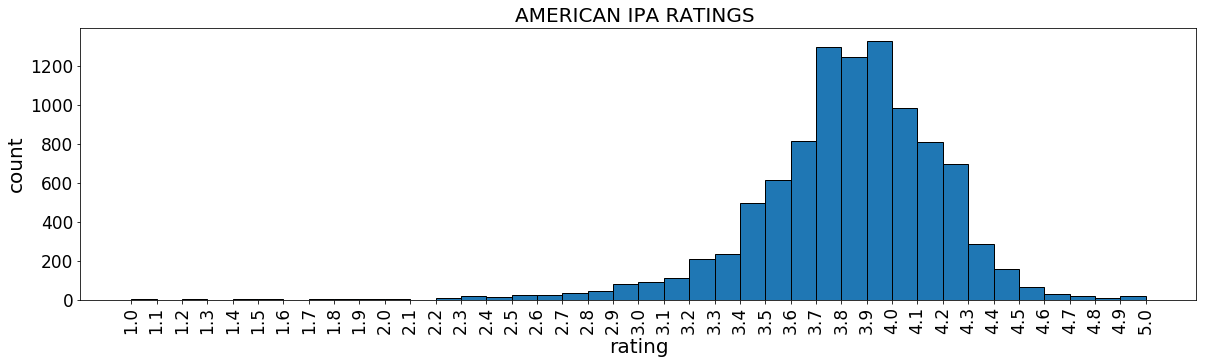

In [6]:
# American IPA
bins= np.arange(1,5.1,0.1)   # bins from 1 to 5, increments of 0.1
_= plt.figure(figsize=(20,5))
_= plt.hist(AmericanIPA.rating, bins=bins, edgecolor="k") #
_= plt.xticks(bins, rotation='vertical',size=17)
_= plt.yticks(size=17)
_= plt.title('AMERICAN IPA RATINGS ', size=20)
_= plt.xlabel('rating', size=20)
_= plt.ylabel('count', size=20)
plt.show()

#### show both histograms together to compare IPA to all beers

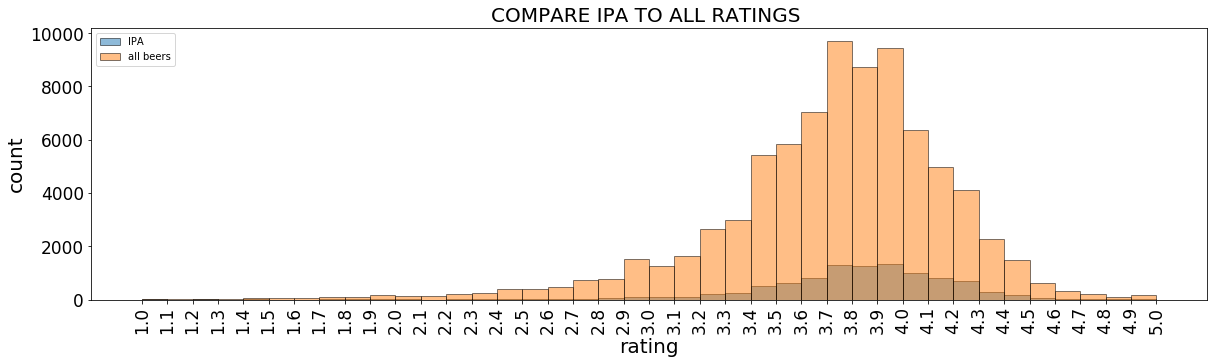

In [7]:
# American IPA ratings compared to all ratings
bins= np.arange(1,5.1,0.1)   # bins from 1 to 5, increments of 0.1
_= plt.figure(figsize=(20,5))
_= plt.hist(AmericanIPA.rating, bins=bins, alpha=0.5, edgecolor="k", label='IPA') 
_= plt.hist(df['rating'], bins=bins, edgecolor="k", alpha=0.5, label='all beers') 
_= plt.xticks(bins, rotation='vertical',size=17)
_= plt.yticks(size=17)
_= plt.title('COMPARE IPA TO ALL RATINGS ', size=20)
_= plt.xlabel('rating', size=20)
_= plt.ylabel('count', size=20)
_= plt.legend(loc='upper left')
plt.show()

In [8]:
# compare IPA to all beers using mean, median, and standard dev.
# note: formatting for median is 2 decimals, but for mean it is long.  use .format

meanrating= df.rating.mean()
meanIPA = AmericanIPA.rating.mean()
print('mean     all: {:.2f}'.format(meanrating), '   IPA: {:.2f}'.format(meanIPA) )
print('median   all:', df.rating.median(), '   IPA:', AmericanIPA.rating.median())
SDrating= df.rating.std()
SDIPA = AmericanIPA.rating.std()
print('std dev  all: {:.2f}'.format(SDrating), '   IPA: {:.2f}'.format(SDIPA)) 

mean     all: 3.73    IPA: 3.84
median   all: 3.79    IPA: 3.87
std dev  all: 0.46    IPA: 0.36


#### The histogram for IPA looks like a subset of the histogram for all beers.  It's hard to visually distinguish.  But the mean and median are higher, and the std deviation is smaller.  
#### So the ratings for IPA are higher and more consistent than the ratings for all beers.  
#### I wonder if this is by chance, or if it's likely to always be true.  
#### I'll look at another beer, one with even higher average rating: 

In [9]:
AmerDblImpStout = pd.DataFrame
AmerDblImpStout = df[df['style'] == 'American Double / Imperial Stout']
AmerDblImpStout.describe()

,rating
count,2465.000000
mean,4.065570
std,0.374164
min,1.000000
25%,3.880000
50%,4.110000
75%,4.310000
max,5.000000


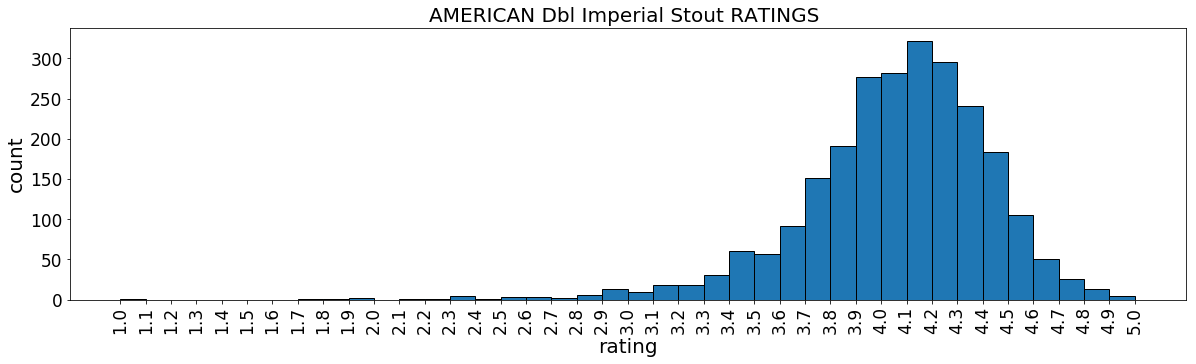

mean rating: 4.07
standard deviation: 0.3742
median rating: 4.11


In [10]:
# AmerDblImpStout
bins= np.arange(1,5.1,0.1)   # bins from 1 to 5, increments of 0.1
_= plt.figure(figsize=(20,5))
_= plt.hist(AmerDblImpStout.rating, bins=bins, edgecolor="k") #
_= plt.xticks(bins, rotation='vertical',size=17)
_= plt.yticks(size=17)
_= plt.title('AMERICAN Dbl Imperial Stout RATINGS ', size=20)
_= plt.xlabel('rating', size=20)
_= plt.ylabel('count', size=20)
plt.show()

stout_mean= AmerDblImpStout.rating.mean()
print('mean rating: {:.2f}'.format(stout_mean))
stout_std= AmerDblImpStout.rating.std()
print('standard deviation: {:.4f}'.format(stout_std))
print('median rating:', AmerDblImpStout.rating.median())

In [11]:
# compare IPA to stout using mean, median, and standard dev.
# note: formatting for median is 2 decimals, but for mean it is long.  use .format

stout_mean= AmerDblImpStout.rating.mean()
ipa_mean = AmericanIPA.rating.mean()
print('mean     stout: {:.2f}'.format(stout_mean), '   IPA: {:.2f}'.format(ipa_mean) )
print('median   stout:', AmerDblImpStout.rating.median(), '   IPA:', AmericanIPA.rating.median())
stout_std= AmerDblImpStout.rating.std()
ipa_std = AmericanIPA.rating.std()
print('std dev  stout: {:.2f}'.format(stout_std), '   IPA: {:.2f}'.format(ipa_std)) 

mean     stout: 4.07    IPA: 3.84
median   stout: 4.11    IPA: 3.87
std dev  stout: 0.37    IPA: 0.36


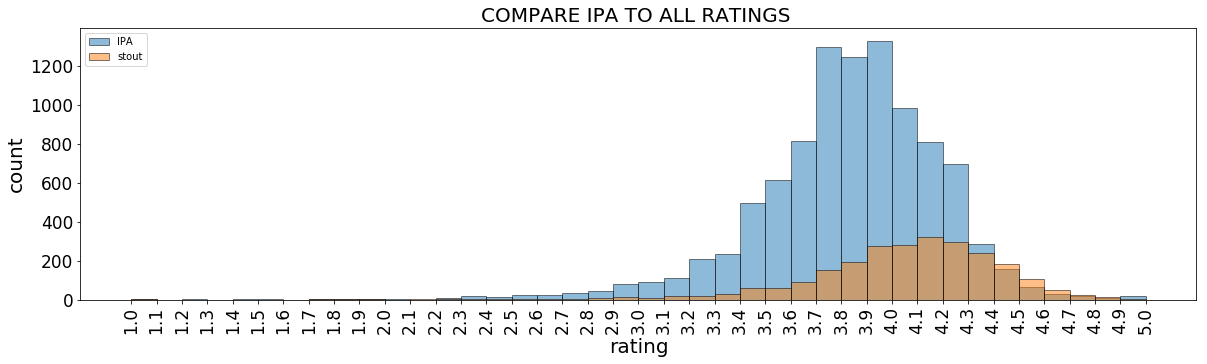

In [12]:
# American IPA ratings compared to all ratings
bins= np.arange(1,5.1,0.1)   # bins from 1 to 5, increments of 0.1
_= plt.figure(figsize=(20,5))
_= plt.hist(AmericanIPA.rating, bins=bins, alpha=0.5, edgecolor="k", label='IPA') 
_= plt.hist(AmerDblImpStout.rating, bins=bins, alpha=0.5, edgecolor="k", label='stout') 
_= plt.xticks(bins, rotation='vertical',size=17)
_= plt.yticks(size=17)
_= plt.title('COMPARE IPA TO ALL RATINGS ', size=20)
_= plt.xlabel('rating', size=20)
_= plt.ylabel('count', size=20)
_= plt.legend(loc='upper left')
plt.show()

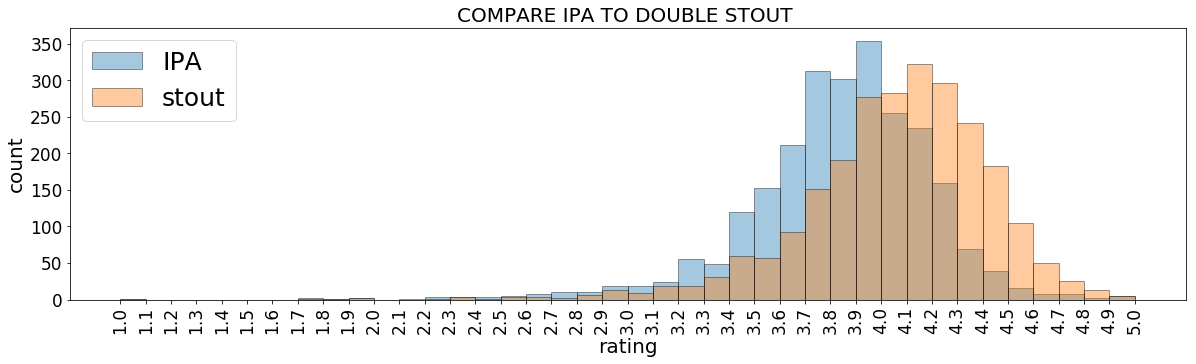

In [16]:
# re-do the histogram with same number of ratings for each
length = min(len(AmerDblImpStout.rating), len(AmericanIPA.rating))
bins= np.arange(1,5.1,0.1)   # bins from 1 to 5, increments of 0.1
_= plt.figure(figsize=(20,5))
_= plt.hist(AmericanIPA.rating[:length], bins=bins, alpha=0.4, edgecolor="k", label='IPA') 
_= plt.hist(AmerDblImpStout.rating[:length], bins=bins, alpha=0.4, edgecolor="k", label='stout') 
_= plt.xticks(bins, rotation='vertical',size=17)
_= plt.yticks(size=17)
_= plt.title('COMPARE IPA TO DOUBLE STOUT ', size=20)
_= plt.xlabel('rating', size=20)
_= plt.ylabel('count', size=20)
_= plt.legend(loc='upper left', prop={'size':25})
plt.show()

#### American Double Imperial Stout clearly rates higher than American IPA.  Is this difference statistically significant?

In [14]:
from scipy import stats
length = min(len(AmerDblImpStout.rating), len(AmericanIPA.rating))
stats.ttest_rel(AmericanIPA.rating[:length], AmerDblImpStout.rating[:length])

Ttest_relResult(statistic=-21.232741414335003, pvalue=5.1096641345127424e-92)

#### In my sample ratings, Stout rates higher than IPA by about 0.21 (ratings scale is 1-5.)  Perhaps this is not always true, but I may have sampled some ratings with higher stout reviews (null hypothesis.)  Howevcer, the p-value associated is very small (5 e-92), therefore I can infer with confidence, that this is not by chance, but that stout rates better than IPA across the population.  